## Linear Regression in Python Assignment 3 

## Importing CSV and Printing to Ensure Proper File

In [2]:
#Reading the csv

In [3]:
import csv #importing the csv file
with open('regression_data.csv', 'r') as lr_data: #opening the csv file and renaming it
    csv_reader = csv.reader(lr_data) #reading the csv file
    for row in csv_reader:
        print(row) #for every single row of our CSV file, print it

['YearsExperience', 'Salary']
['1.1', '39343.0']
['1.3', '46205.0']
['1.5', '37731.0']
['2.0', '43525.0']
['2.2', '39891.0']
['2.9', '56642.0']
['3.0', '60150.0']
['3.2', '54445.0']
['3.7', '57189.0']
['4.0', '63218.0']


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np #these are all necessary packages for the graph and the line

In [5]:
data = pd.read_csv('regression_data.csv') #re-reading the csv, using pandas to make it more malleable for data analysis

In [6]:
x_lr = np.array(data.YearsExperience) #creating a variable out of an array of the x values in the CSV file
y_lr = np.array(data.Salary) #creating a variable out of an array of the y values in the CSV file

print(x_lr) 
print (y_lr) #This is just another way to print the CSV file

[1.1 1.3 1.5 2.  2.2 2.9 3.  3.2 3.7 4. ]
[39343. 46205. 37731. 43525. 39891. 56642. 60150. 54445. 57189. 63218.]


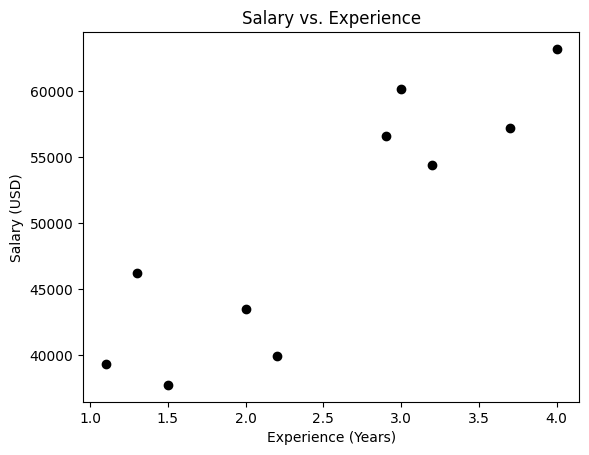

In [7]:
plt.scatter(x_lr, y_lr, color='k') #creates the scatterplot of the data using matplotlib and the two created arrays for the data
plt.title('Salary vs. Experience') #title of the plot
plt.xlabel('Experience (Years)') #the title of the x axis
plt.ylabel('Salary (USD)') #the title of the y axis
plt.show()

## Creating the Linear Regression Fit

In [8]:
np.polyfit(x_lr, y_lr, 1) #using the polyfit function in numpy, with the x data and the y data and the 1 saying its a linear line, the slope and intercept for the linear regression line are printed

array([ 8285.2920999 , 29203.52267124])

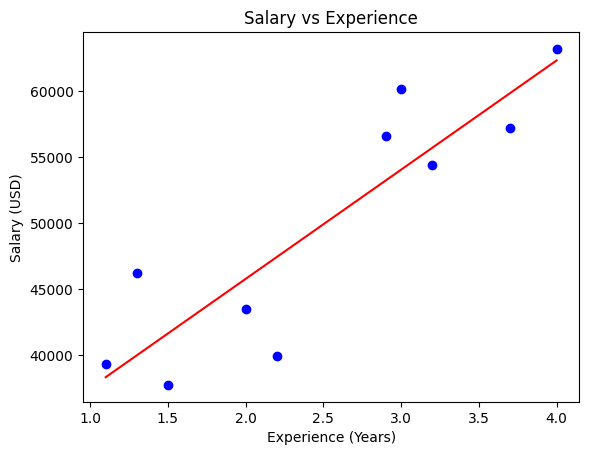

In [9]:
plt.scatter(x_lr, y_lr, color='b')
plt.title('Salary vs Experience')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (USD)') #All above is repeated code to create the plot
slope, intercept = np.polyfit(x_lr, y_lr, 1) #creating variables for slope and intercept using the numpy function
abline_values = [slope * x + intercept for x in x_lr] #creates the line using slope and intercept previously calculated
plt.plot(x_lr, abline_values, color='red') #plotting the line itself with the x axis and the y values
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(data[["YearsExperience"]], data[["Salary"]]) #this is the method we learned in class, using sklearn to model the linear regression

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


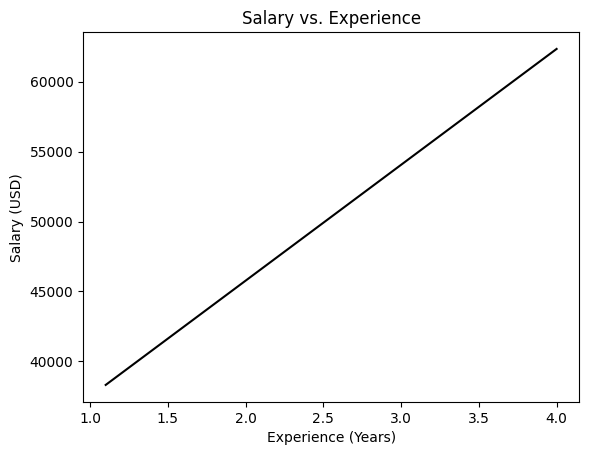

In [11]:
plt.plot(data["YearsExperience"], model.predict(data[["YearsExperience"]]), color='k') #creates the scatterplot of the data using matplotlib and the two created arrays for the data
plt.title('Salary vs. Experience') #title of the plot
plt.xlabel('Experience (Years)') #the title of the x axis
plt.ylabel('Salary (USD)') #the title of the y axis
plt.show() #using the code we learned in class, this just plots the line itself. Not terribly useful

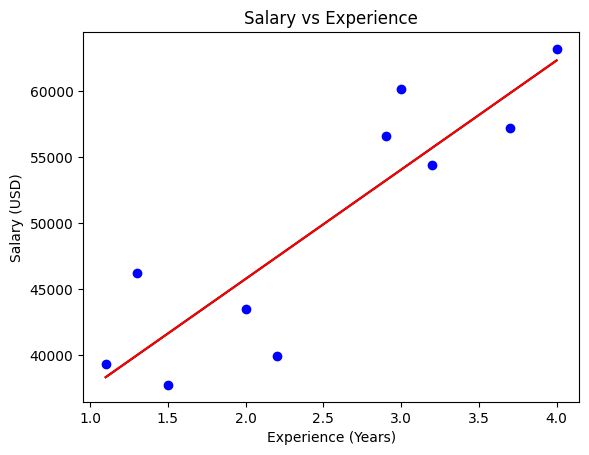

In [12]:
plt.scatter(x_lr, y_lr, color='b') #the plot itself
plt.plot(data["YearsExperience"], model.predict(data[["YearsExperience"]]), color='k') #The line on the plot
plt.title('Salary vs Experience') 
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (USD)') #All above is repeated code to create the plot
slope, intercept = np.polyfit(x_lr, y_lr, 1) #creating variables for slope and intercept using the numpy function
abline_values = [slope * x + intercept for x in x_lr] #creates the line using slope and intercept previously calculated
plt.plot(x_lr, abline_values, color='red') #plotting the line itself with the x axis and the y values
plt.show()

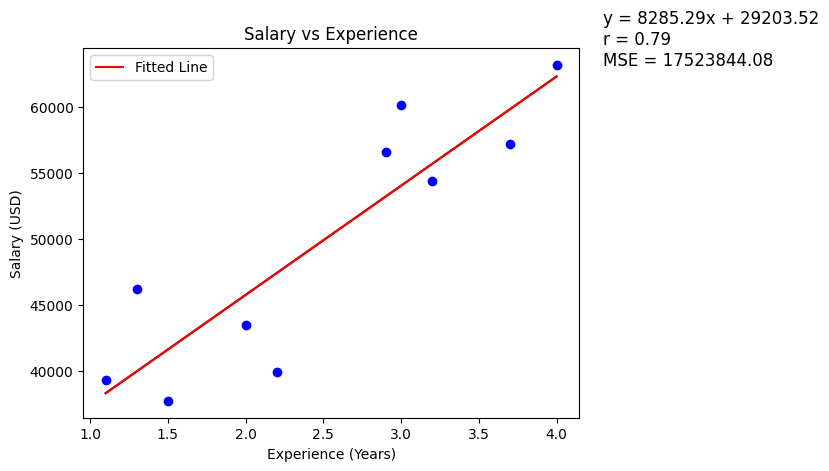

In [13]:
plt.scatter(x_lr, y_lr, color='b') #the plot itself
plt.plot(data["YearsExperience"], model.predict(data[["YearsExperience"]]), color='k') #The line on the plot
plt.title('Salary vs Experience') 
plt.xlabel('Experience (Years)')
plt.ylabel('Salary (USD)') #All above is repeated code to create the plot
slope, intercept = np.polyfit(x_lr, y_lr, 1) #creating variables for slope and intercept using the numpy function
abline_values = [slope * x + intercept for x in x_lr] #creates the line using slope and intercept previously calculated
plt.plot(x_lr, abline_values, 'r-', label='Fitted Line') #plotting the line itself with the x axis and the y values
from sklearn.metrics import mean_squared_error #MSE module
mse = mean_squared_error(y_lr, abline_values) #MSE calculation
r_value = model.score(data[["YearsExperience"]], data[["Salary"]]) #calculated the rsquared value
plt.text(4.3, max(y_lr) - 3, #adding the text to the graph
         f"y = {slope:.2f}x + {intercept:.2f}\n"
             f"r = {r_value:.2f}\nMSE = {mse:.2f}",
         fontsize=12)
plt.legend() #creating the fitted line legend
plt.savefig("updated_regression_plot_python.png") #saving the file
plt.show() #showing the file

## STATISTICAL ANALYSIS

In [14]:
from sklearn.metrics import mean_squared_error #MSE module
mse = mean_squared_error(y_lr, abline_values) #MSE calculation
print(mse)
print('The mean squared error (MSE) is the average squared difference between predicted and actual values. A lower MSE means better regression line and smaller errors.')
# in our linear regression example, the MSE is over 17 million. That is so so so high.

17523844.08290277
The mean squared error (MSE) is the average squared difference between predicted and actual values. A lower MSE means better regression line and smaller errors.


In [15]:
print(model.intercept_) #y-intercept
print('The y intercept of the linear regression line tells you what the dependent variable will be when the independent variable is zero')
# in our linear regression example, the starting salary for zero years of experience should be roughly 29000 USD

[29203.52267124]
The y intercept of the linear regression line tells you what the dependent variable will be when the independent variable is zero


In [16]:
print(model.coef_) #slope
print("The slope of the linear regression line tells you for every unit increase of x, y should go up by about that much")
# in our linear regression example, for every one year of experience you accrue, it is predicted your salary increases by roughly 8000 USD

[[8285.2920999]]
The slope of the linear regression line tells you for every unit increase of x, y should go up by about that much


In [17]:
model.score(data[["YearsExperience"]], data[["Salary"]]) #calculated the rsquared value
print(model.score(data[["YearsExperience"]], data[["Salary"]])) #prints the rsquared value
print('the r-squared value shows how much of the variance in the dependence variable is explained by the independent variable')
# in our linear regression example, the r-squared value is 0.78, which I do not believe to be a great r-squared value. This means that the change in salary is only 78% due to the years of experience.

0.7851515863136573
the r-squared value shows how much of the variance in the dependence variable is explained by the independent variable


In [18]:
from scipy.stats import pearsonr #using pearsonr to calculate the correlation coefficient
correlation, p_value = pearsonr(x_lr, y_lr) #the function itself
print(f"Pearson correlation: {correlation}, p-value: {p_value}") #printing the correlation coefficient and the p value
print(np.corrcoef(x_lr, y_lr)[0,1]) #using numpy to do this as well sans p-value
print('the correlation coefficient tells you how linear the relationship between these two values are between -1 and +1')
# in our linear regression example, the correlation coefficient is close to positive one, indicating high linearity between the two

Pearson correlation: 0.886087798309884, p-value: 0.0006406523231644738
0.8860877983098837
